In [1]:
import numpy as np
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [27]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','+','8']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend,
                            alpha=0.5)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

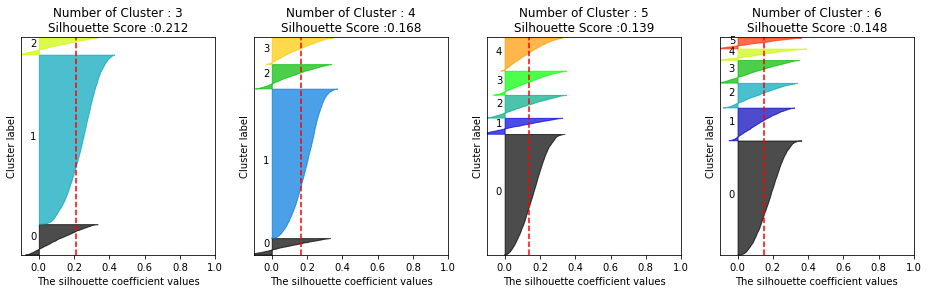

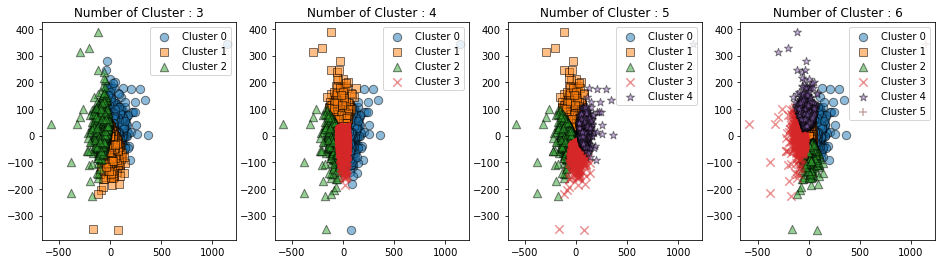

In [28]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
import matplotlib.pyplot as plt

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
# 4개의 군집일 때 가장 최적
visualize_silhouette([ 3, 4, 5,6], X)
visualize_kmeans_plot_multi([3,4,5,6],X)

In [16]:
import pandas as pd
data = pd.read_csv('dataframe/origin_df_1014.csv')
data.head(2)

,label,cust_no,amount_1,amount_2,amount_A_1,amount_A_2,amount_B_1,amount_B_2,amount_C_1,amount_C_2,...,의약품_2,일상용품_2,전문스포츠/레저_2,패션잡화_2,내구재_1_ratio,내구재_2_ratio,주중_1,주중_2,주말_1,주말_2
0,1,1,19925355.0,34116312.0,19703210.0,33340300.0,21800.0,376140.0,200345.0,399872.0,...,8000.0,4707600.0,0.0,589100.0,0.008916,0.405447,0.817610,0.744292,0.182390,0.255708
1,0,2,24323230.0,21922100.0,24292730.0,21875650.0,30500.0,46450.0,0.0,0.0,...,0.0,7642020.0,2704920.0,530910.0,0.080269,0.052967,0.659574,0.712575,0.340426,0.287425


In [34]:
X = data1.loc[data1['label'] == 1 ]
X1 = X.drop(['label','cust_no'],axis=1).fillna(0)


In [47]:
data1 = pd.read_csv('dataframe/최종변수_1014.csv')
data1.head(2)

,cust_no,mem_1,mem_2,label,가공식품_ratio_ch,가구/인테리어_ratio_ch,가전_ratio_ch,교육/문화용품_ratio_ch,기타_ratio_ch,명품_ratio_ch,...,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2
0,1,0.0,0.0,1,-0.143741,0.130907,0.265624,0.0,0.0,0.000000,...,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,6.4,7.5
1,2,0.0,0.0,0,-0.013168,-0.020040,-0.027066,0.0,0.0,0.019804,...,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,-8.0,-8.5


In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,random_state=0).fit(X1)

X['cluster'] = kmeans.labels_


In [76]:
X

,cust_no,mem_1,mem_2,label,가공식품_ratio_ch,가구/인테리어_ratio_ch,가전_ratio_ch,교육/문화용품_ratio_ch,기타_ratio_ch,명품_ratio_ch,...,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,cluster
0,1,0.0,0.0,1,-0.143741,0.130907,0.265624,0.000000,0.0,0.000000,...,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,6.4,7.5,1
2,3,0.0,0.0,1,-0.097874,0.000000,0.025802,0.000000,0.0,0.000000,...,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,0.4,-0.8,2
3,4,0.0,0.0,1,-0.043599,0.098064,0.000000,0.000000,0.0,0.000000,...,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,4.0,-3.0,1
4,5,0.0,0.0,1,0.043156,0.095384,-0.009139,0.000000,0.0,-0.010439,...,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-4.8,-4.0,1
14,15,0.0,0.0,1,0.075741,0.000000,0.000000,0.000000,0.0,0.000000,...,-2.0,-7.0,0.0,-3.0,0.0,0.0,0.0,4.8,-4.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19184,19333,0.0,0.0,1,-0.056119,0.000000,0.000000,-0.033593,0.0,0.000000,...,0.0,-0.2,0.0,-0.2,0.0,0.0,0.0,0.8,-0.3,1
19185,19334,4.0,10.0,1,0.022696,0.004967,0.000000,0.025701,0.0,0.000000,...,0.8,0.5,0.0,-0.4,0.6,0.0,0.0,2.4,2.2,0
19197,19346,0.0,0.0,1,-0.195635,0.000000,-0.040712,0.000000,0.0,0.000000,...,0.2,1.2,0.0,0.0,0.0,-2.7,0.0,0.0,-1.6,2
19210,1208,0.0,0.0,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,1


In [77]:
data3 = pd.merge(data1, X[['cust_no','cluster']],on='cust_no',how='left')
data3['cluster'].fillna(3, inplace=True)

data3

,cust_no,mem_1,mem_2,label,가공식품_ratio_ch,가구/인테리어_ratio_ch,가전_ratio_ch,교육/문화용품_ratio_ch,기타_ratio_ch,명품_ratio_ch,...,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,cluster
0,1,0.0,0.0,1,-0.143741,0.130907,0.265624,0.0,0.0,0.000000,...,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,6.4,7.5,1.0
1,2,0.0,0.0,0,-0.013168,-0.020040,-0.027066,0.0,0.0,0.019804,...,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,-8.0,-8.5,3.0
2,3,0.0,0.0,1,-0.097874,0.000000,0.025802,0.0,0.0,0.000000,...,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,0.4,-0.8,2.0
3,4,0.0,0.0,1,-0.043599,0.098064,0.000000,0.0,0.0,0.000000,...,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,4.0,-3.0,1.0
4,5,0.0,0.0,1,0.043156,0.095384,-0.009139,0.0,0.0,-0.010439,...,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-4.8,-4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.0,0.0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
19334,19377,0.0,2.0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
19335,19378,0.0,0.0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
19336,19379,0.0,1.0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [62]:
from sklearn.model_selection import train_test_split
data2 = pd.merge(data1, X[['cust_no','cluster']].loc[X['cluster']==0],on='cust_no',how='left')
data2['cluster'].fillna(1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

[Text(1674.0, 2935.44, 'freq_C_2_ch <= -50.5\ngini = 0.064\nsamples = 15470\nvalue = [510, 14960]'),
 Text(837.0, 2283.12, 'freq_C_1_ch <= -11.5\ngini = 0.468\nsamples = 842\nvalue = [314, 528]'),
 Text(418.5, 1630.8000000000002, 'freq_C_2_ch <= -126.5\ngini = 0.203\nsamples = 218\nvalue = [25, 193]'),
 Text(209.25, 978.48, 'freq_C_1_ch <= -102.0\ngini = 0.471\nsamples = 29\nvalue = [18, 11]'),
 Text(104.625, 326.1600000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(313.875, 326.1600000000003, 'gini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(627.75, 978.48, 'total_freq_weight_10 <= -6.9\ngini = 0.071\nsamples = 189\nvalue = [7, 182]'),
 Text(523.125, 326.1600000000003, 'gini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(732.375, 326.1600000000003, 'gini = 0.034\nsamples = 172\nvalue = [3, 169]'),
 Text(1255.5, 1630.8000000000002, 'total_level_weight <= -0.95\ngini = 0.497\nsamples = 624\nvalue = [289, 335]'),
 Text(1046.25, 978.48, 'freq_C_2_ch <= -67.5\ngini = 0.408\ns

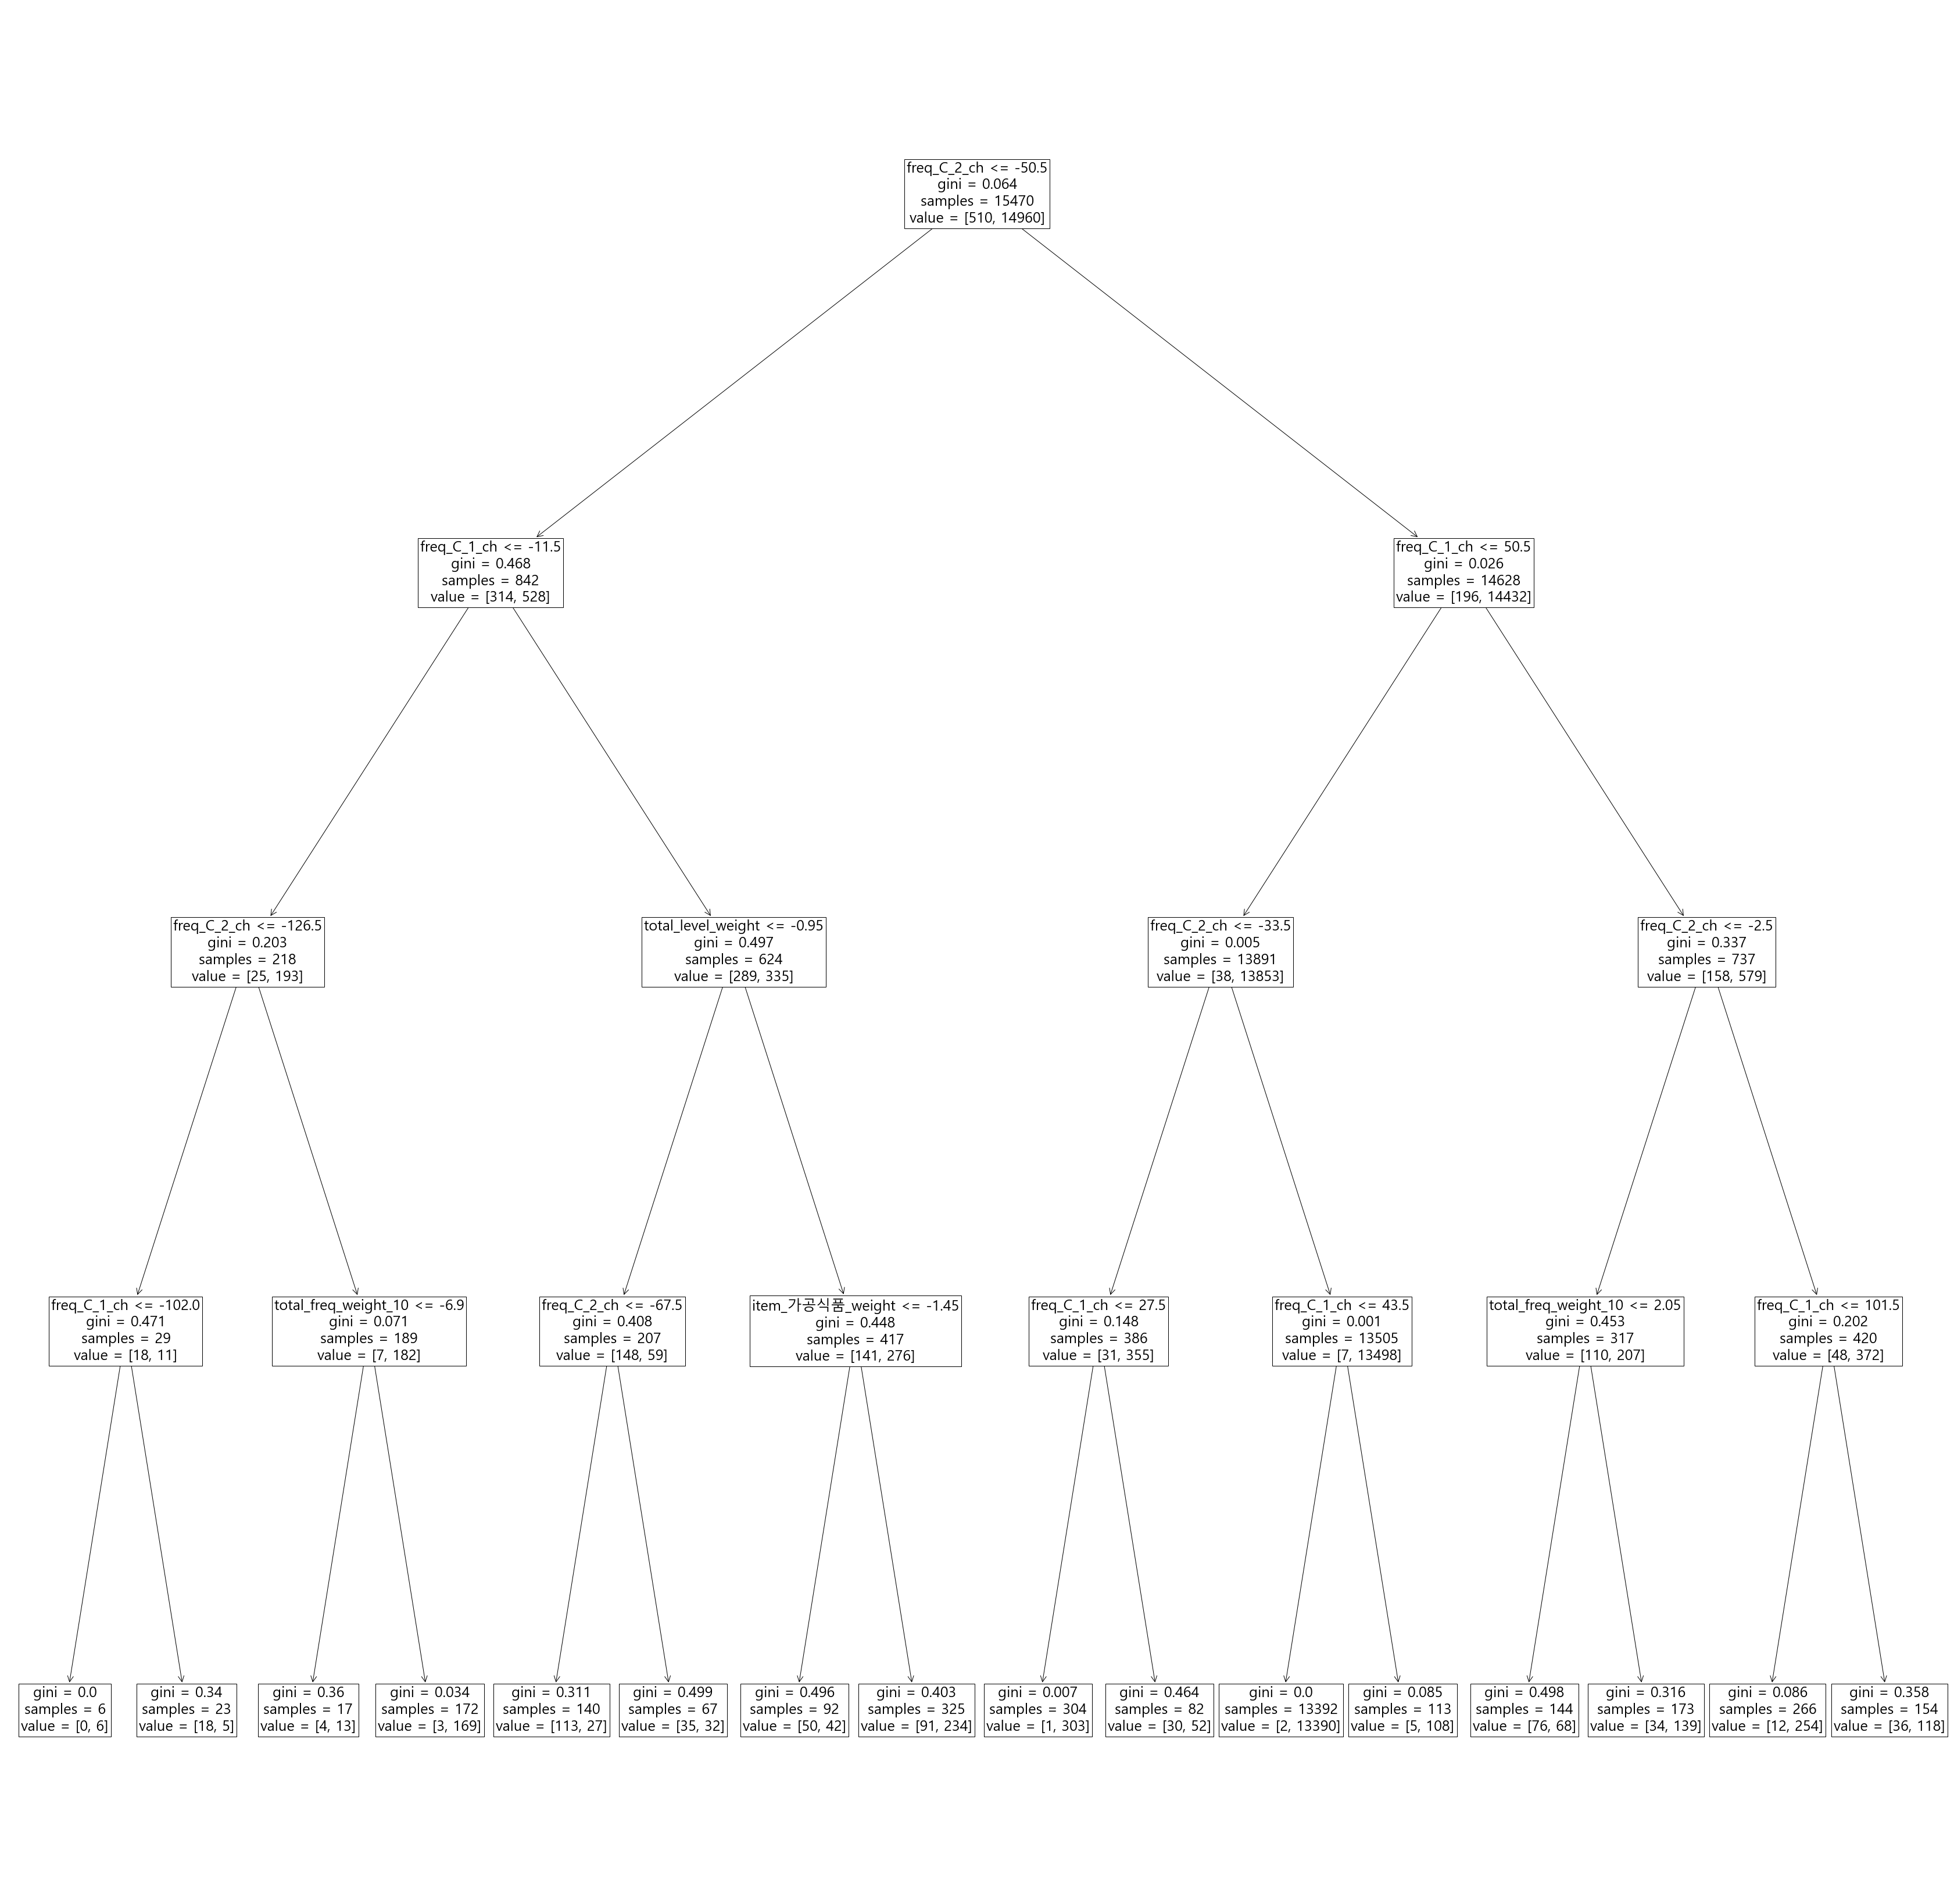

In [63]:
# cluster 0

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1674.0, 2935.44, 'total_level_weight <= -1.05\ngini = 0.413\nsamples = 15470\nvalue = [4513, 10957]'),
 Text(837.0, 2283.12, 'freq_B_2_ch <= -22.5\ngini = 0.5\nsamples = 5085\nvalue = [2505, 2580]'),
 Text(418.5, 1630.8000000000002, 'freq_B_2_ch <= -44.5\ngini = 0.253\nsamples = 914\nvalue = [136, 778]'),
 Text(209.25, 978.48, 'freq_A_2_ch <= 54.0\ngini = 0.044\nsamples = 447\nvalue = [10, 437]'),
 Text(104.625, 326.1600000000003, 'gini = 0.031\nsamples = 441\nvalue = [7, 434]'),
 Text(313.875, 326.1600000000003, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(627.75, 978.48, 'freq_B_1_ch <= -16.5\ngini = 0.394\nsamples = 467\nvalue = [126, 341]'),
 Text(523.125, 326.1600000000003, 'gini = 0.014\nsamples = 140\nvalue = [1, 139]'),
 Text(732.375, 326.1600000000003, 'gini = 0.472\nsamples = 327\nvalue = [125, 202]'),
 Text(1255.5, 1630.8000000000002, 'freq_B_1_ch <= -40.5\ngini = 0.491\nsamples = 4171\nvalue = [2369, 1802]'),
 Text(1046.25, 978.48, 'freq_B_2_ch <= 39.5\ngini = 0.

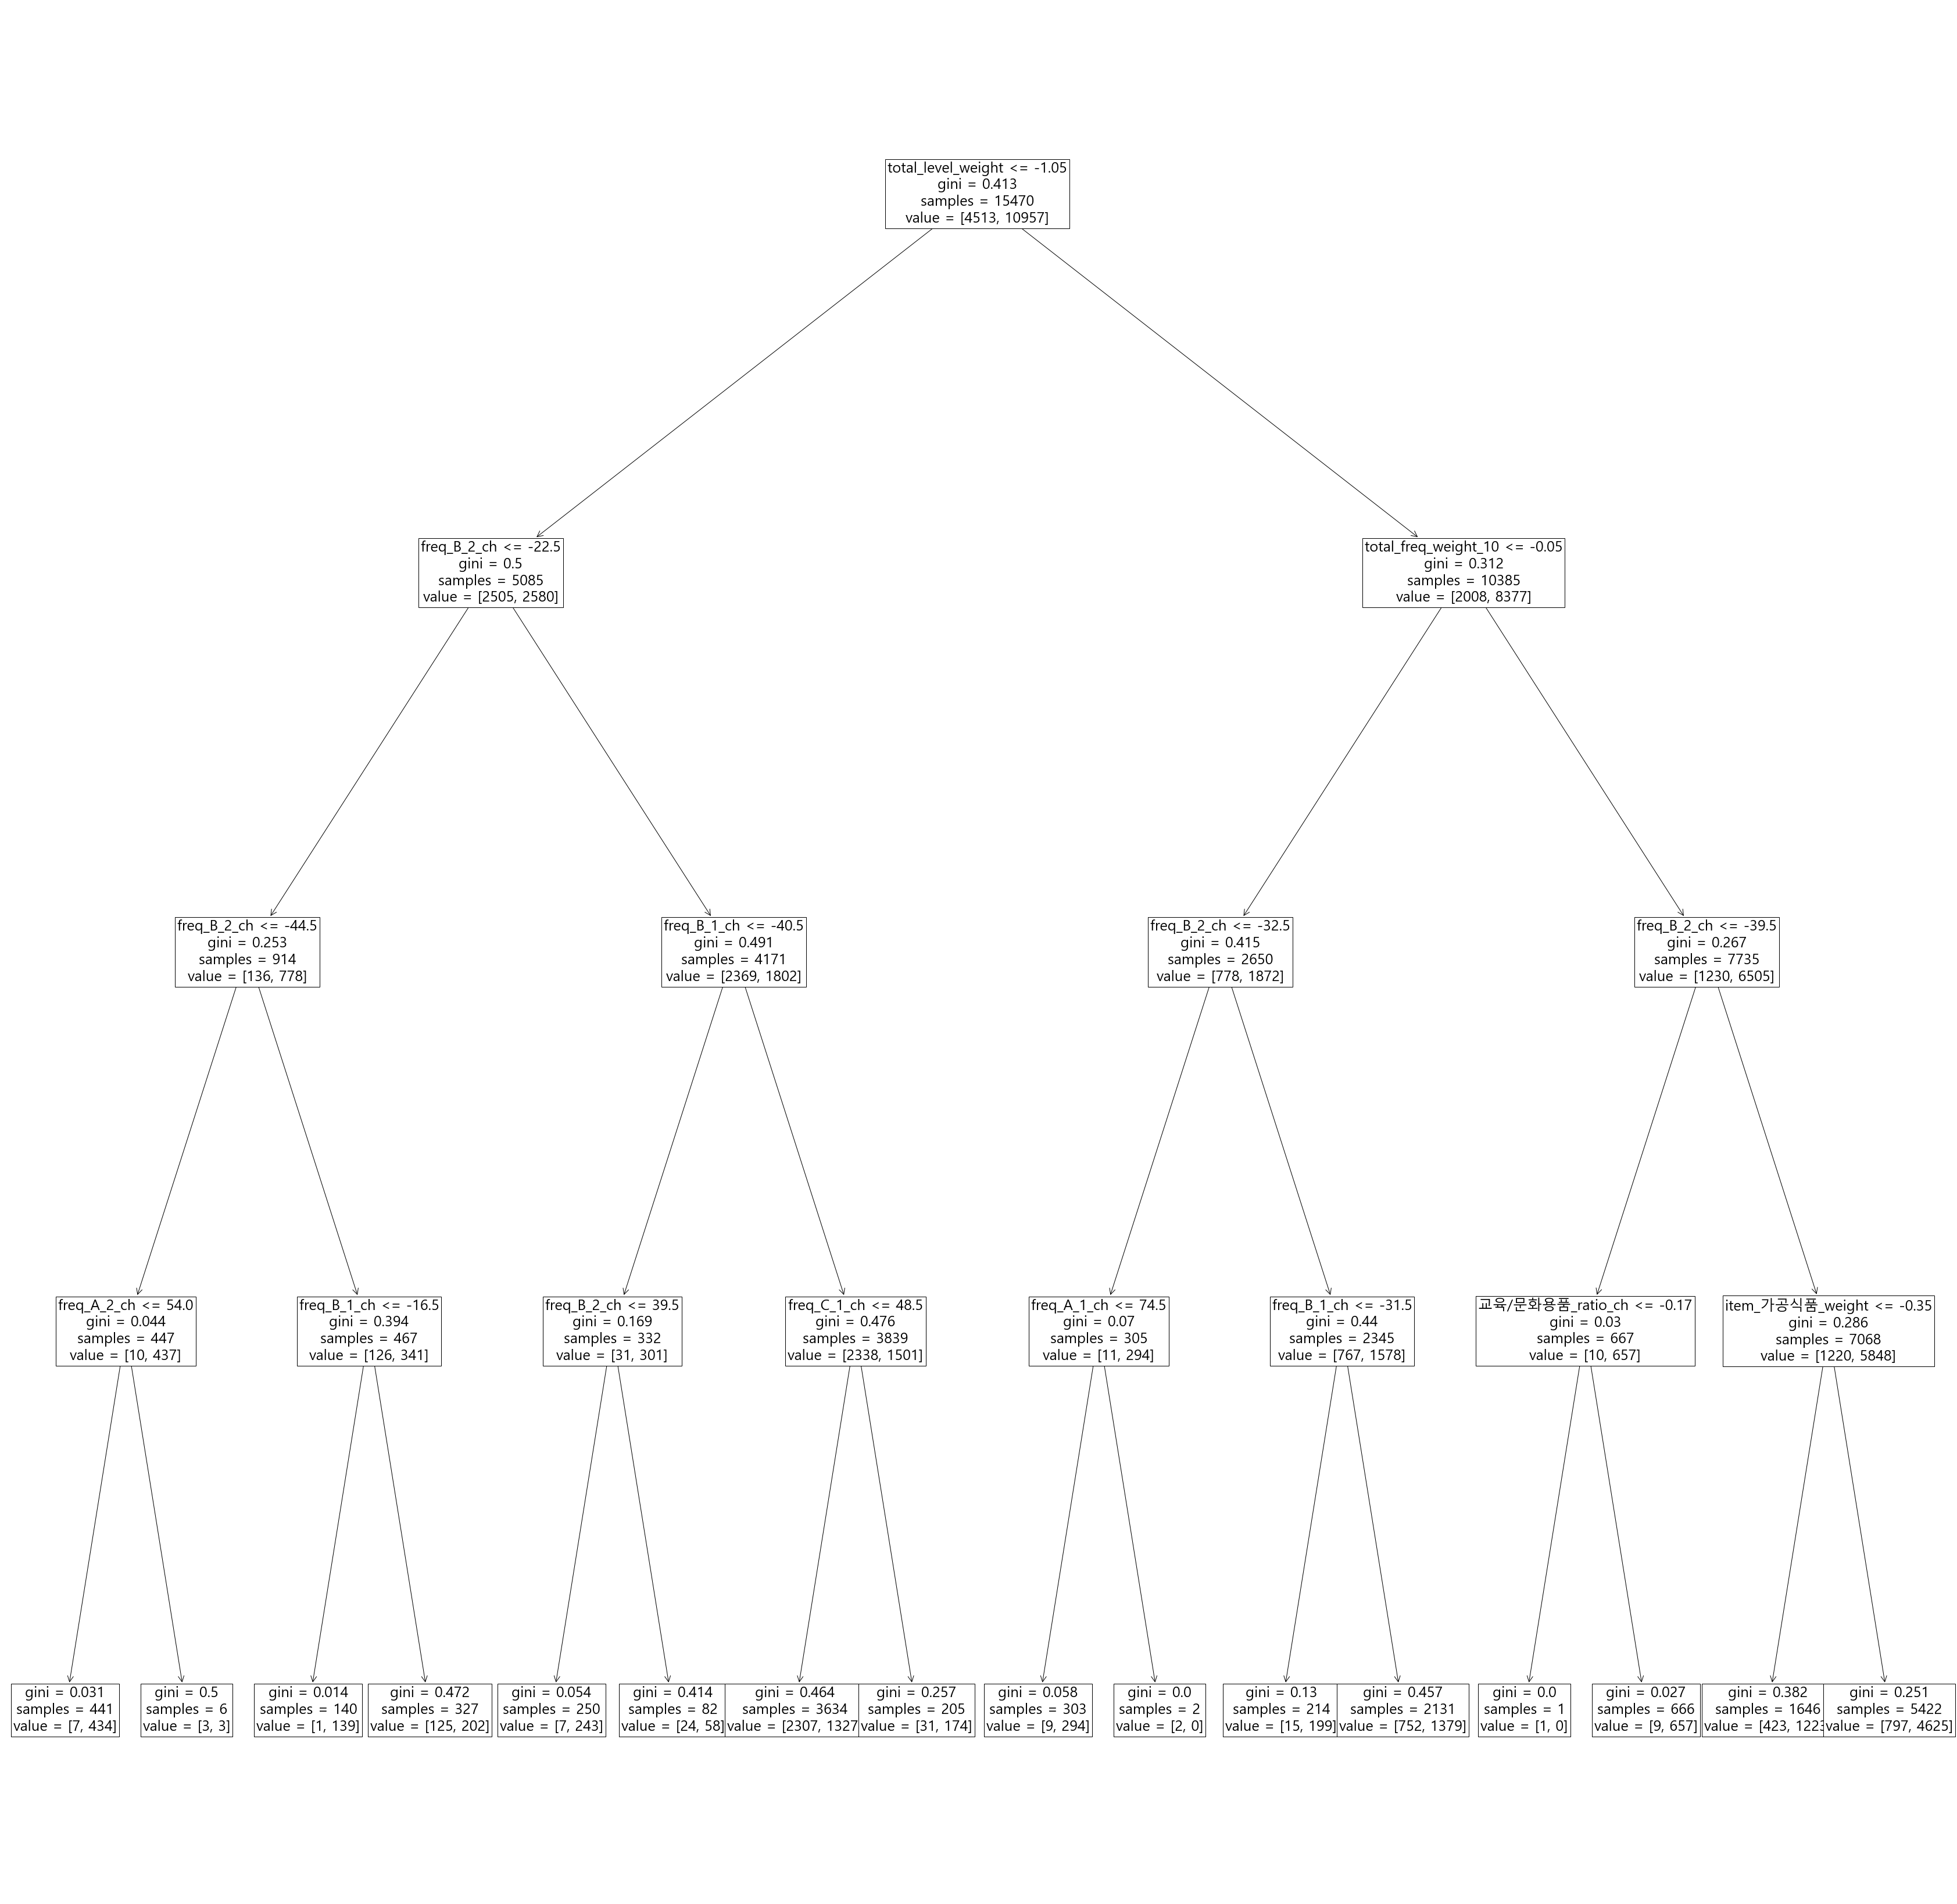

In [64]:
# cluter1

from sklearn.model_selection import train_test_split
data2 = pd.merge(data1, X[['cust_no','cluster']].loc[X['cluster']==1],on='cust_no',how='left')
data2['cluster'].fillna(2,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1644.107142857143, 2935.44, 'freq_B_1_ch <= 31.5\ngini = 0.092\nsamples = 15470\nvalue = [745, 14725]'),
 Text(896.7857142857142, 2283.12, 'freq_B_2_ch <= -38.5\ngini = 0.031\nsamples = 13349\nvalue = [207, 13142]'),
 Text(478.2857142857143, 1630.8000000000002, 'freq_B_1_ch <= -8.5\ngini = 0.292\nsamples = 1033\nvalue = [183, 850]'),
 Text(239.14285714285714, 978.48, 'freq_B_2_ch <= -251.5\ngini = 0.03\nsamples = 529\nvalue = [8, 521]'),
 Text(119.57142857142857, 326.1600000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(358.7142857142857, 326.1600000000003, 'gini = 0.023\nsamples = 527\nvalue = [6, 521]'),
 Text(717.4285714285714, 978.48, 'total_level_weight <= -0.75\ngini = 0.453\nsamples = 504\nvalue = [175, 329]'),
 Text(597.8571428571429, 326.1600000000003, 'gini = 0.496\nsamples = 200\nvalue = [109, 91]'),
 Text(837.0, 326.1600000000003, 'gini = 0.34\nsamples = 304\nvalue = [66, 238]'),
 Text(1315.2857142857142, 1630.8000000000002, 'freq_B_2_ch <= -25.5\ngini = 0.

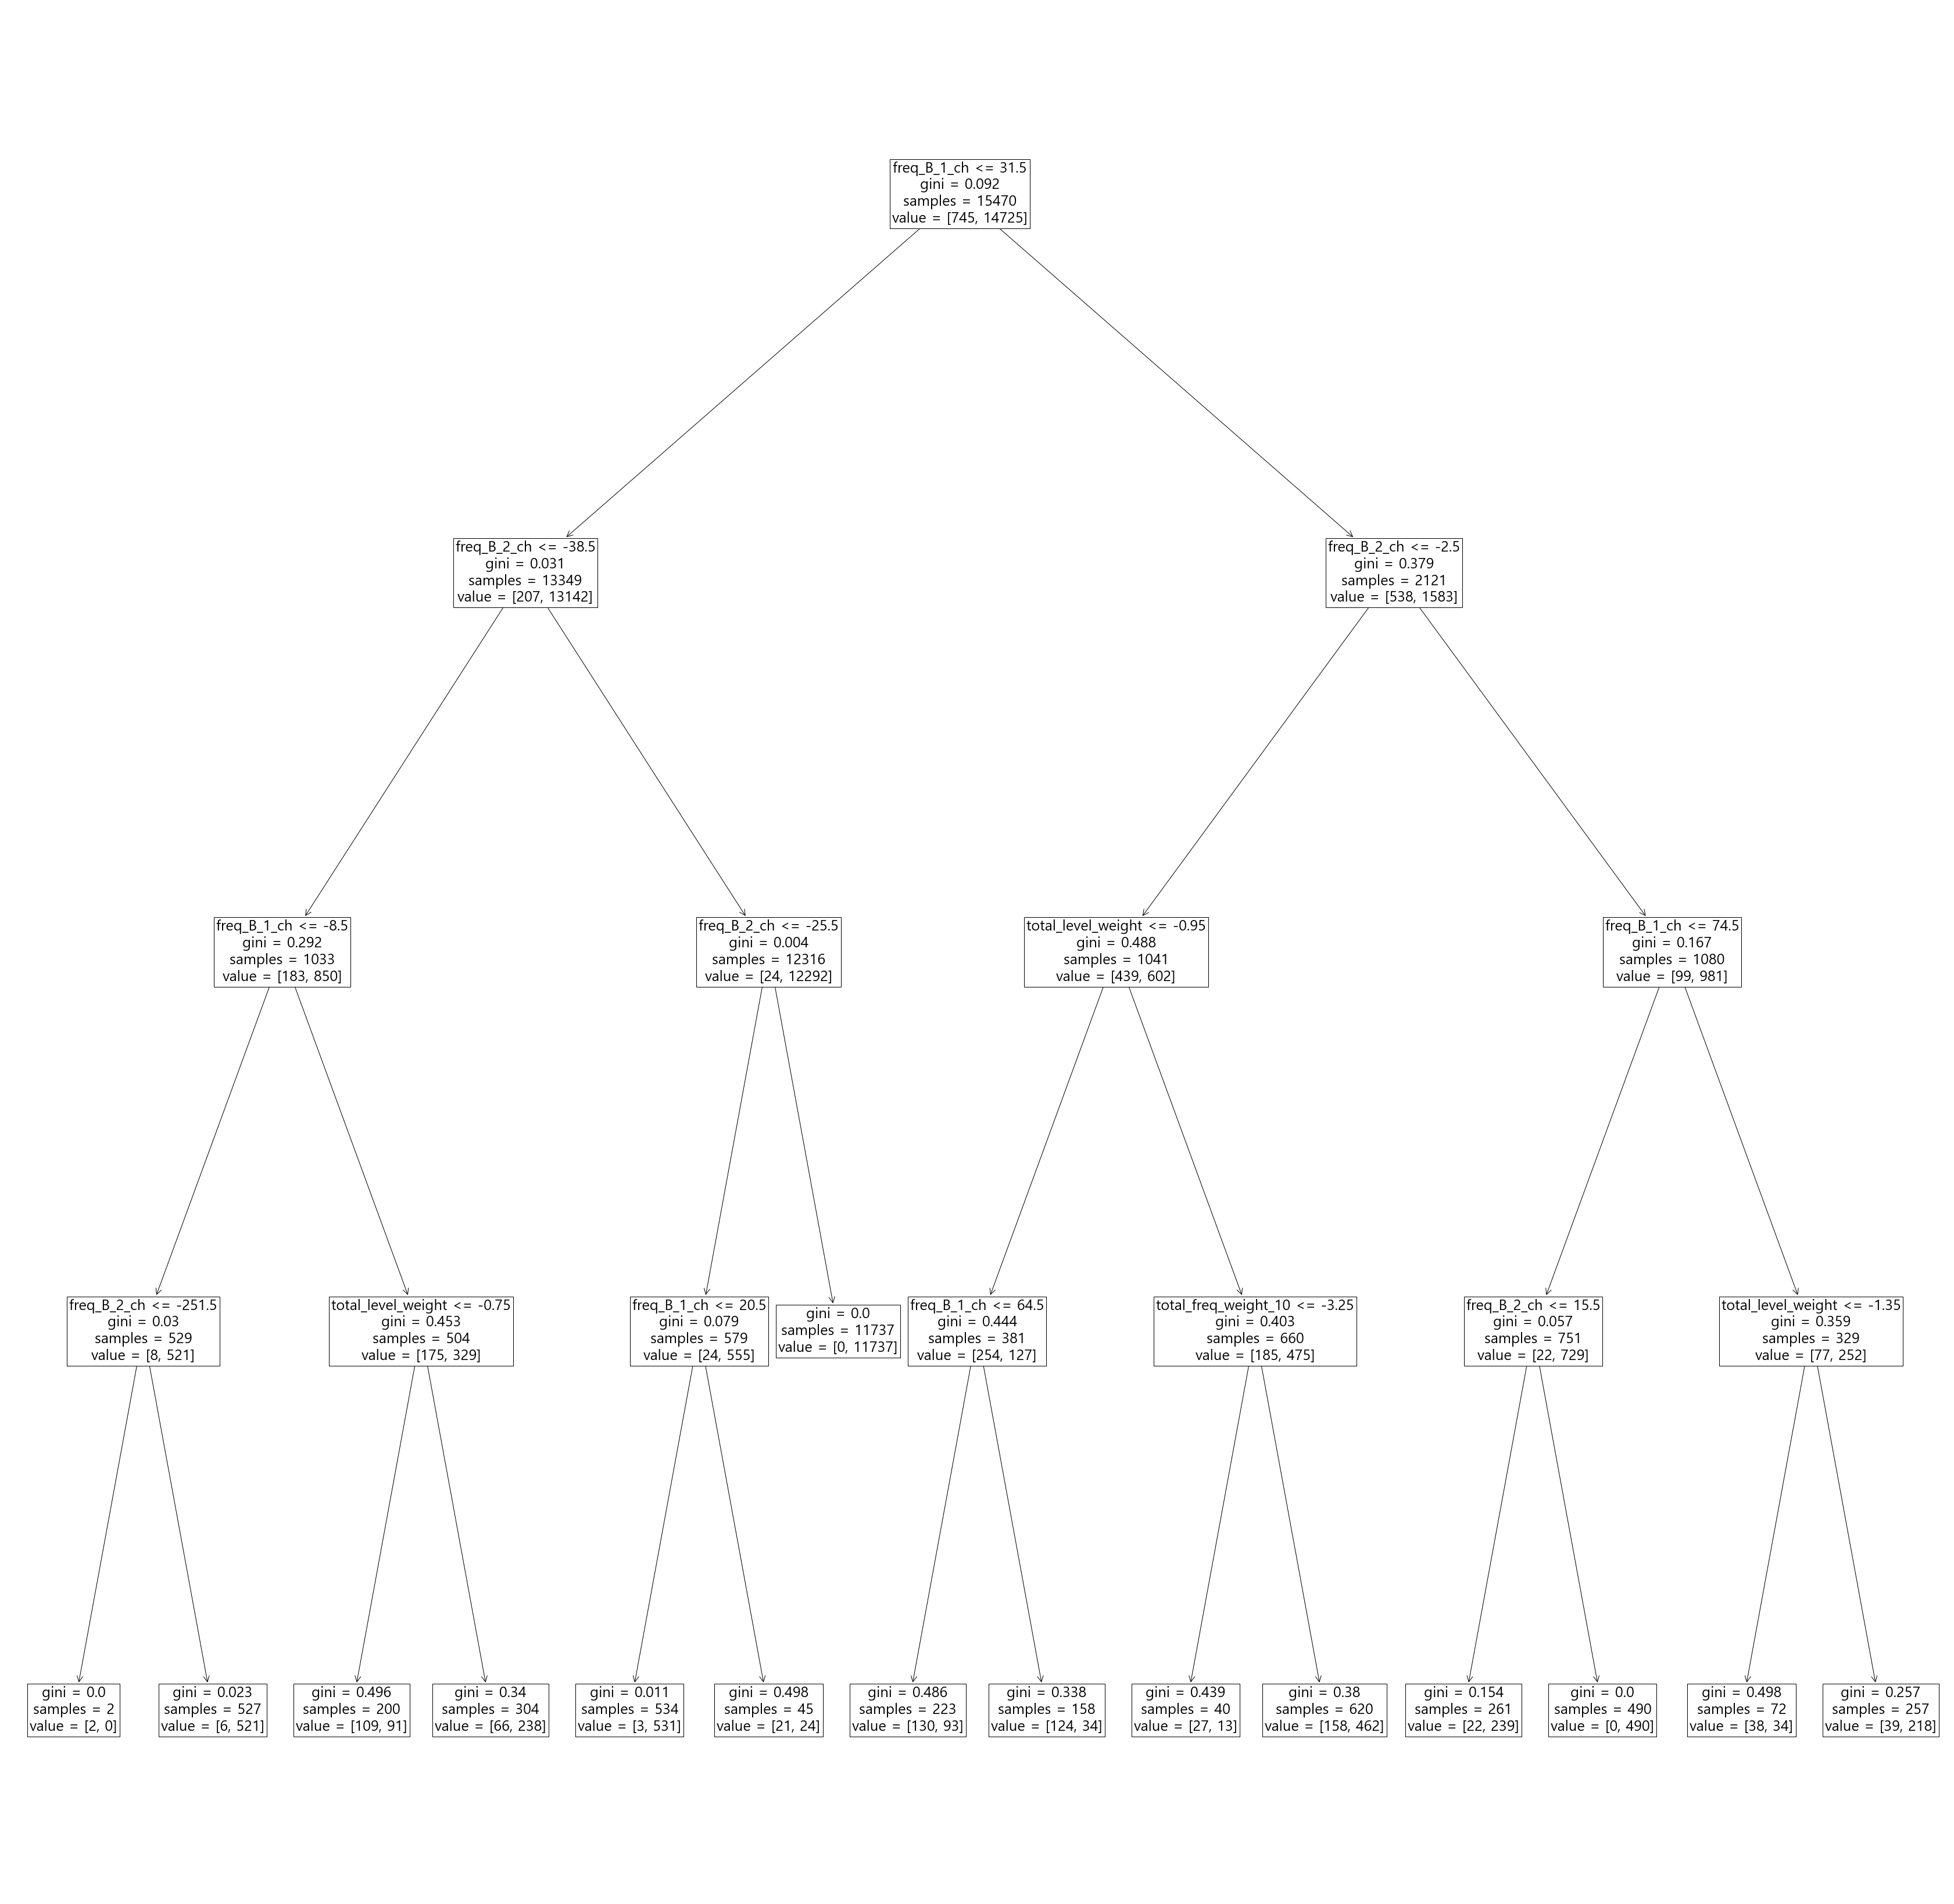

In [65]:
# cluter2

from sklearn.model_selection import train_test_split
data2 = pd.merge(data1, X[['cust_no','cluster']].loc[X['cluster']==2],on='cust_no',how='left')
data2['cluster'].fillna(3,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1674.0, 2935.44, 'freq_B_1_ch <= -30.5\ngini = 0.096\nsamples = 15470\nvalue = [782, 14688]'),
 Text(837.0, 2283.12, 'total_level_weight <= -0.95\ngini = 0.465\nsamples = 1713\nvalue = [629, 1084]'),
 Text(418.5, 1630.8000000000002, 'freq_B_2_ch <= -5.5\ngini = 0.492\nsamples = 738\nvalue = [416, 322]'),
 Text(209.25, 978.48, 'total_level_weight <= -3.25\ngini = 0.38\nsamples = 345\nvalue = [257, 88]'),
 Text(104.625, 326.1600000000003, 'gini = 0.258\nsamples = 151\nvalue = [128, 23]'),
 Text(313.875, 326.1600000000003, 'gini = 0.446\nsamples = 194\nvalue = [129, 65]'),
 Text(627.75, 978.48, 'freq_B_1_ch <= -50.5\ngini = 0.482\nsamples = 393\nvalue = [159, 234]'),
 Text(523.125, 326.1600000000003, 'gini = 0.489\nsamples = 200\nvalue = [115, 85]'),
 Text(732.375, 326.1600000000003, 'gini = 0.352\nsamples = 193\nvalue = [44, 149]'),
 Text(1255.5, 1630.8000000000002, 'freq_B_2_ch <= 11.5\ngini = 0.341\nsamples = 975\nvalue = [213, 762]'),
 Text(1046.25, 978.48, 'item_일상용품_weight <= 

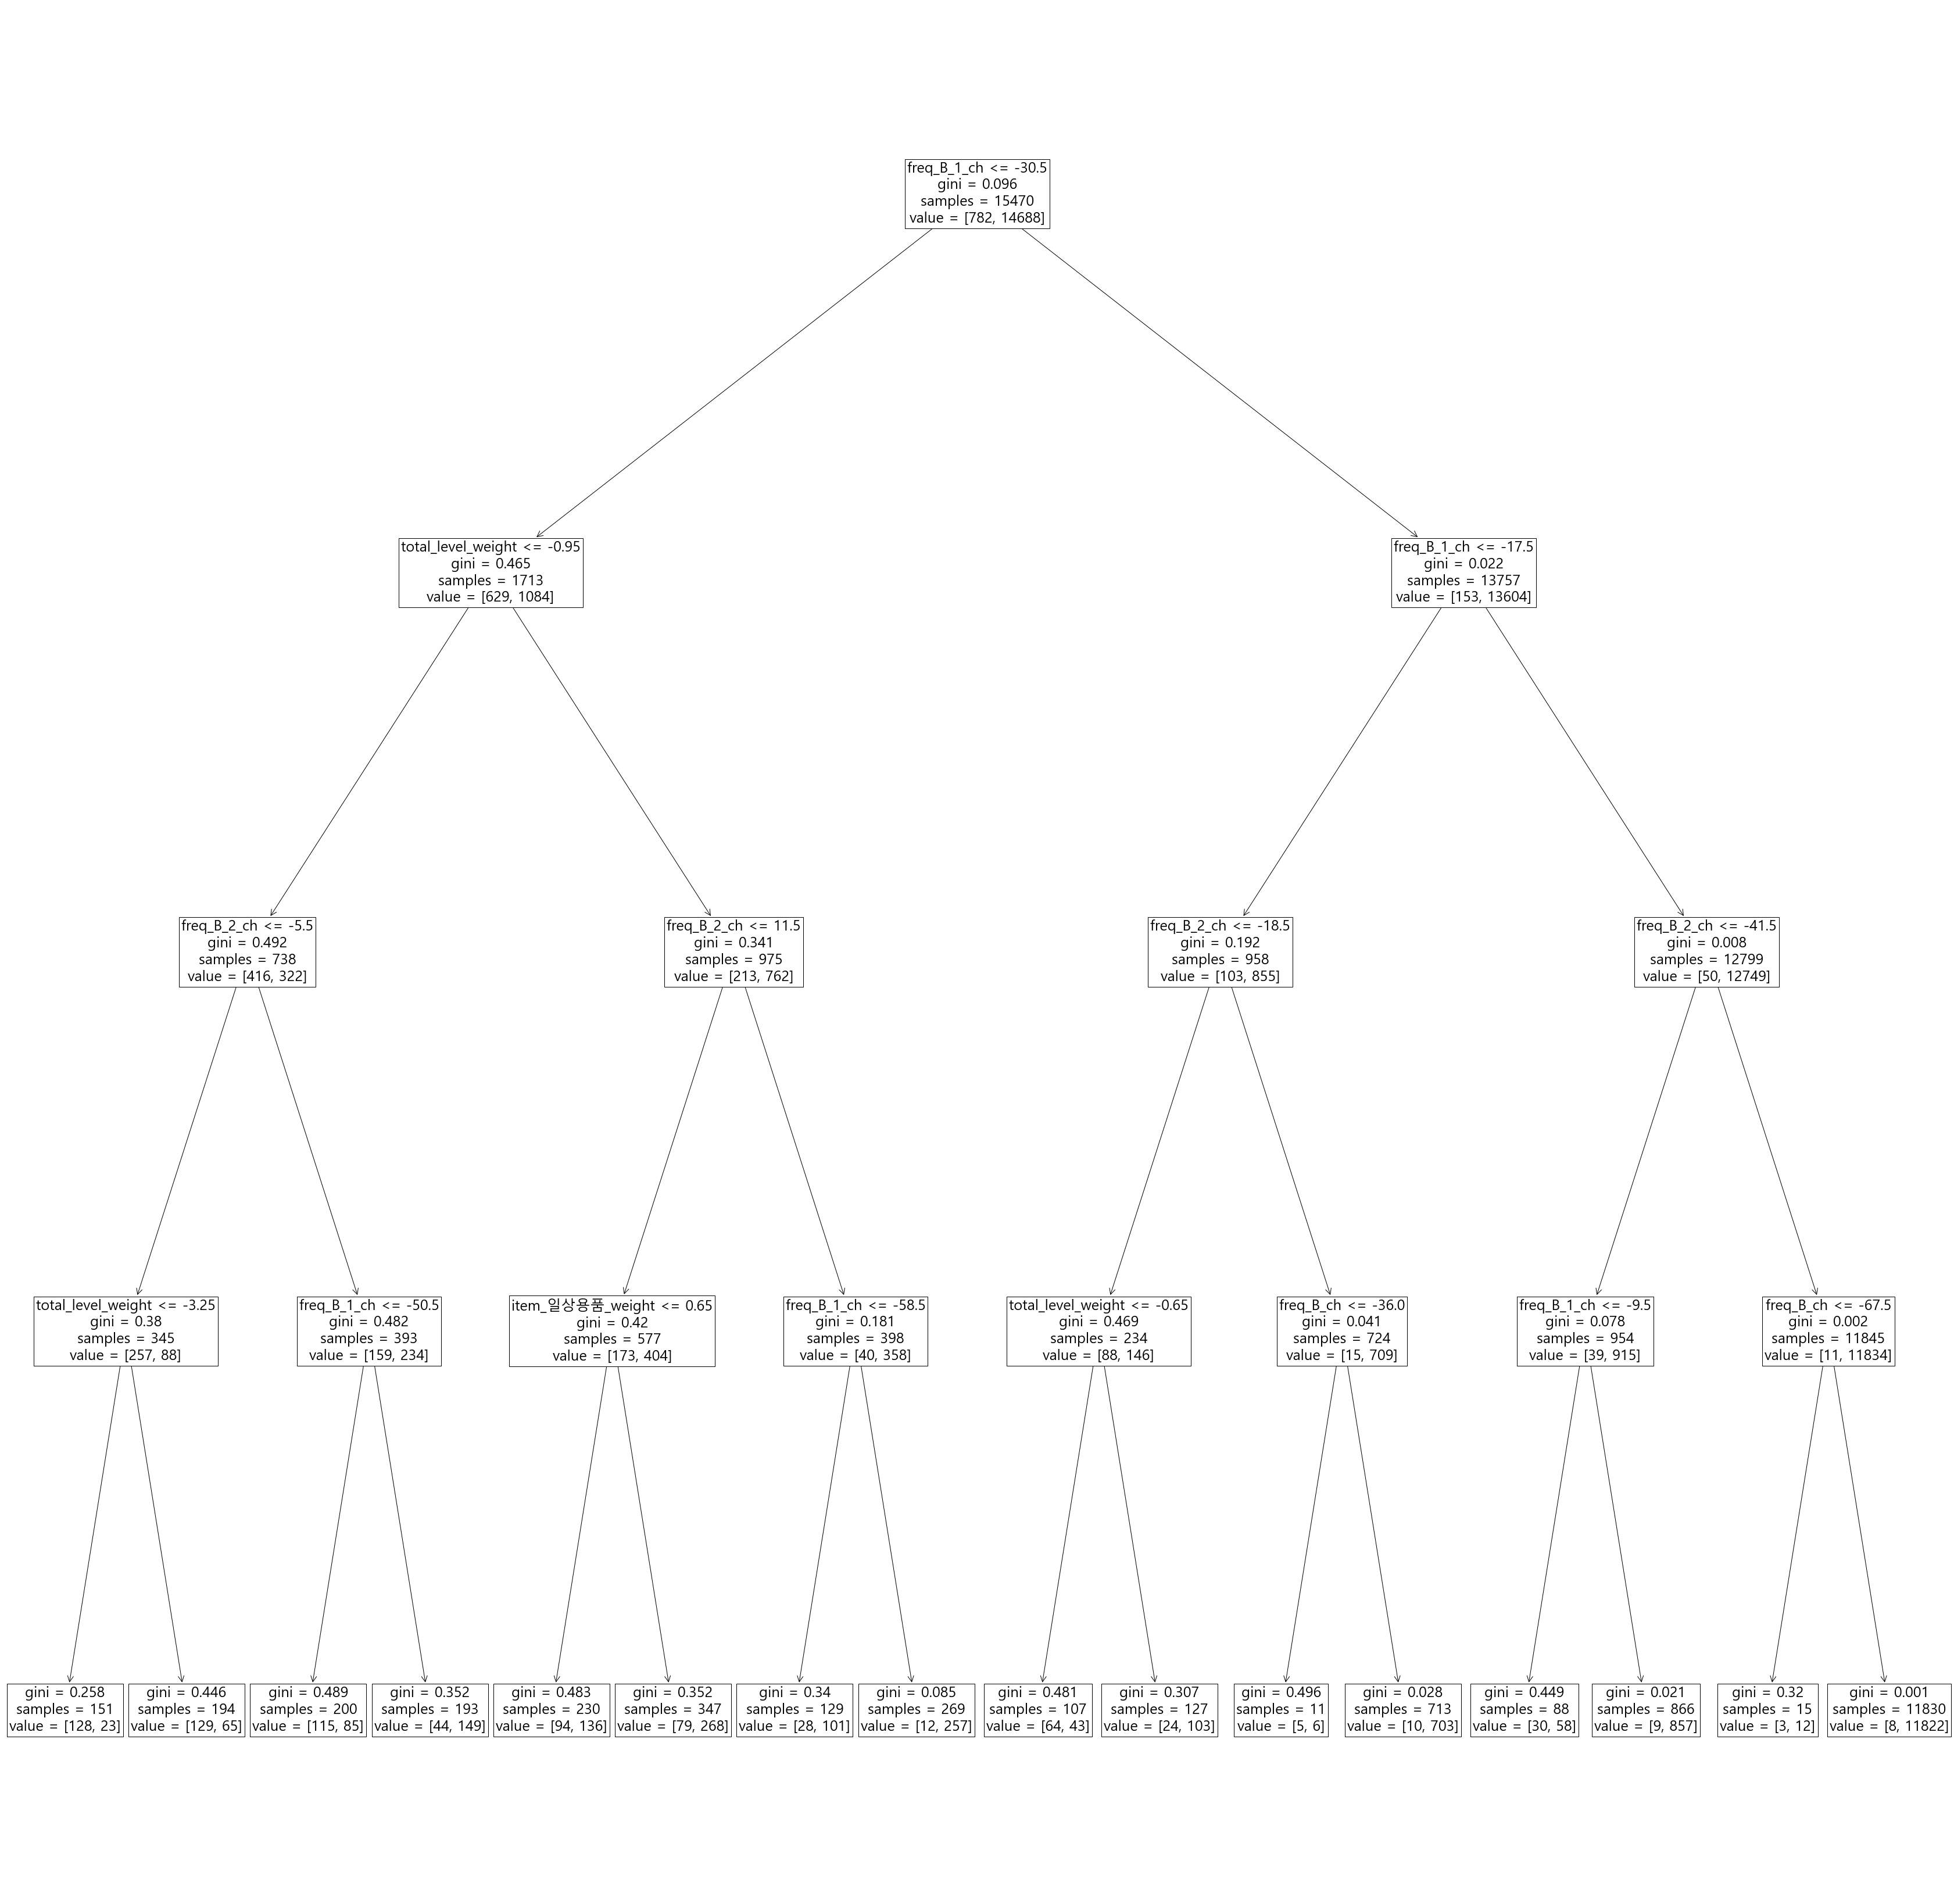

In [66]:
# cluster 3
from sklearn.model_selection import train_test_split
data2 = pd.merge(data1, X[['cust_no','cluster']].loc[X['cluster']==3],on='cust_no',how='left')
data2['cluster'].fillna(4,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data2.drop(['cluster','cust_no','label'],axis=1),data2['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

[Text(1674.0, 2935.44, 'total_level_weight <= -0.95\ngini = 0.488\nsamples = 15470\nvalue = [8920, 6550]'),
 Text(837.0, 2283.12, 'total_level_weight <= -2.65\ngini = 0.42\nsamples = 5442\nvalue = [1632, 3810]'),
 Text(418.5, 1630.8000000000002, '가공식품_ratio_ch <= 0.002\ngini = 0.379\nsamples = 3516\nvalue = [893, 2623]'),
 Text(209.25, 978.48, 'item_가공식품_weight <= -3.1\ngini = 0.431\nsamples = 1060\nvalue = [333, 727]'),
 Text(104.625, 326.1600000000003, 'gini = 0.393\nsamples = 744\nvalue = [200, 544]'),
 Text(313.875, 326.1600000000003, 'gini = 0.487\nsamples = 316\nvalue = [133, 183]'),
 Text(627.75, 978.48, 'B_weight <= -3.35\ngini = 0.352\nsamples = 2456\nvalue = [560, 1896]'),
 Text(523.125, 326.1600000000003, 'gini = 0.238\nsamples = 428\nvalue = [59, 369]'),
 Text(732.375, 326.1600000000003, 'gini = 0.372\nsamples = 2028\nvalue = [501, 1527]'),
 Text(1255.5, 1630.8000000000002, 'total_freq_weight_10 <= -5.05\ngini = 0.473\nsamples = 1926\nvalue = [739, 1187]'),
 Text(1046.25, 9

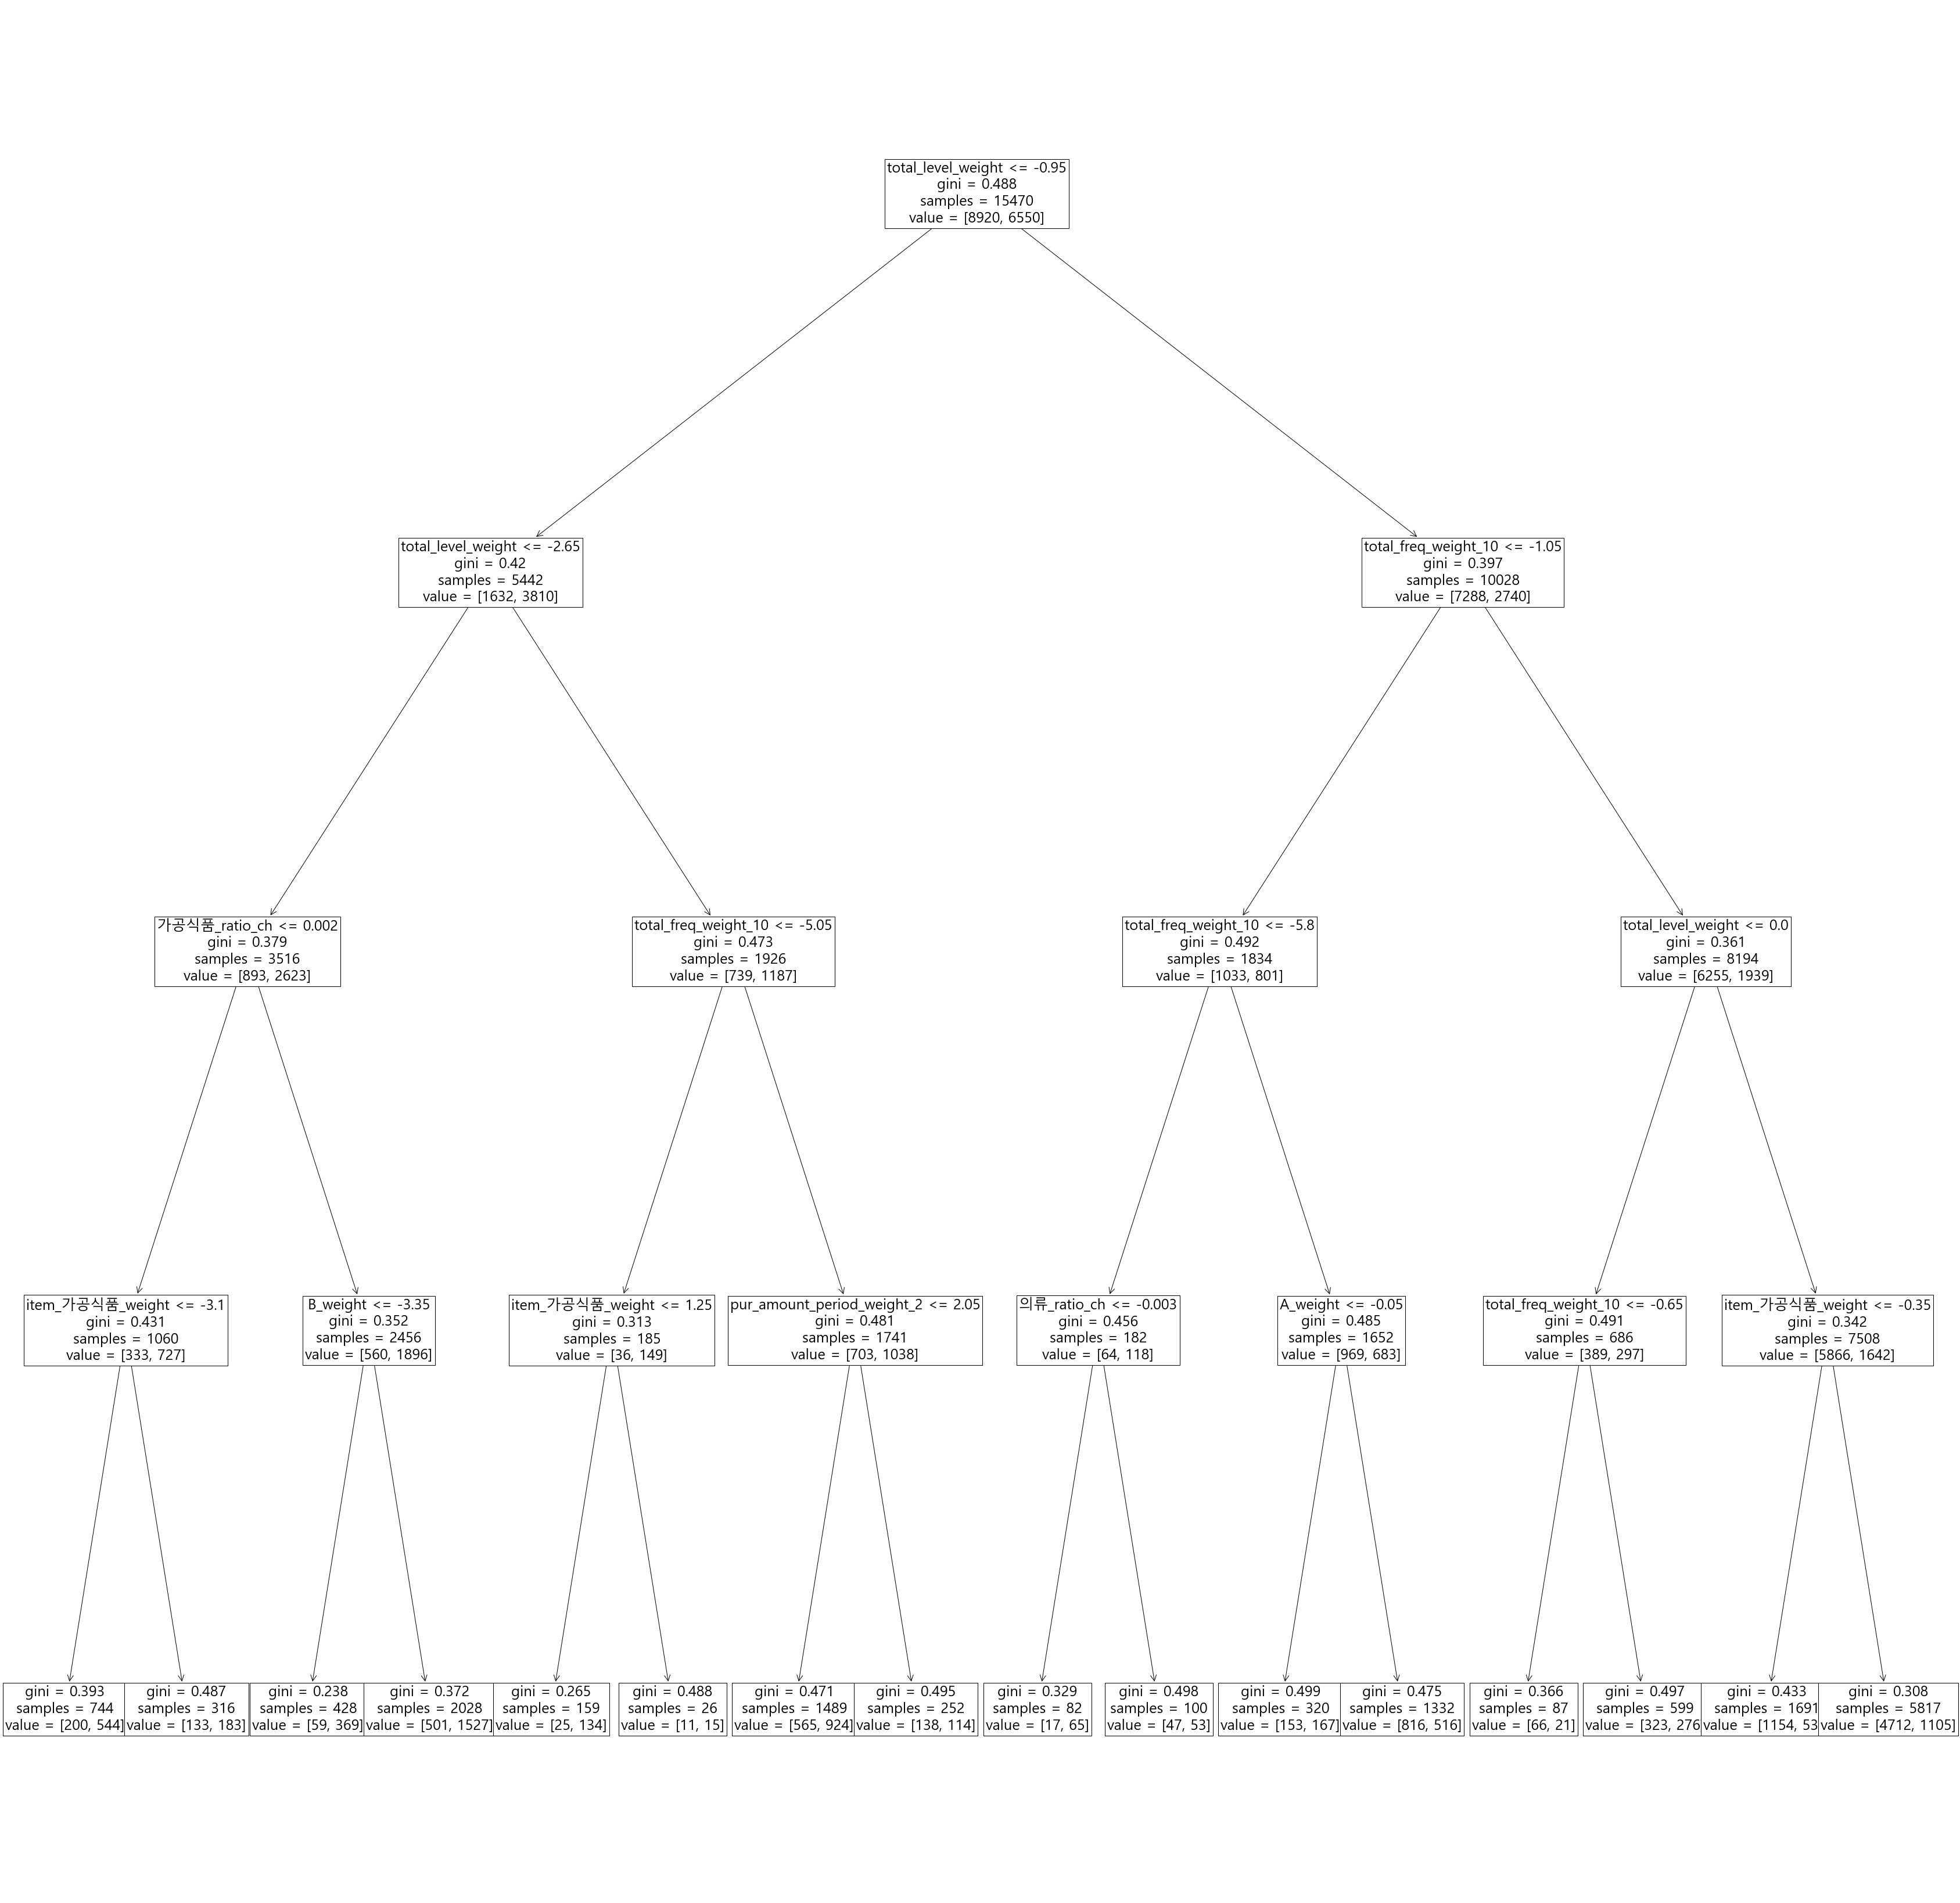

In [69]:
# cluster4 == 증가/유지 고객

from sklearn.model_selection import train_test_split
data3 = pd.merge(data1, X[['cust_no','cluster']],on='cust_no',how='left')
data3['cluster'].fillna(4, inplace=True)
data3['cluster'] = np.where(data3['cluster']==4, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(data3.drop(['cluster','cust_no','label'],axis=1),data3['cluster'],
                                                    test_size = 0.2,
                                                    random_state=7)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier( max_depth= 4)
dt.fit(X_train,y_train)

from sklearn.tree import plot_tree

plt.rc('font',family='Malgun Gothic')
# plt.rc('font', family=font_name)
plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train.columns,fontsize=25)

In [83]:
data3 = pd.merge(data1, X[['cust_no','cluster']],on='cust_no',how='left')
data3['cluster'].fillna(2, inplace=True)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data3.drop(['cluster',],axis=1))

data3['pca_x'] = pca_transformed[:,0]
data3['pca_y'] = pca_transformed[:,1]
data3.head()

,cust_no,mem_1,mem_2,label,가공식품_ratio_ch,가구/인테리어_ratio_ch,가전_ratio_ch,교육/문화용품_ratio_ch,기타_ratio_ch,명품_ratio_ch,...,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,cluster,pca_x,pca_y
0,1,0.0,0.0,1,-0.143741,0.130907,0.265624,0.0,0.0,0.000000,...,0.0,-4.0,7.5,4.5,0.0,6.4,7.5,0.0,-9676.703201,20.620783
1,2,0.0,0.0,0,-0.013168,-0.020040,-0.027066,0.0,0.0,0.019804,...,0.0,-8.5,-5.5,-7.5,1.5,-8.0,-8.5,2.0,-9675.711711,5.620872
2,3,0.0,0.0,1,-0.097874,0.000000,0.025802,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.8,0.0,0.4,-0.8,0.0,-9674.690496,25.343385
3,4,0.0,0.0,1,-0.043599,0.098064,0.000000,0.0,0.0,0.000000,...,0.0,3.6,2.8,0.0,0.0,4.0,-3.0,0.0,-9673.721975,-7.821482
4,5,0.0,0.0,1,0.043156,0.095384,-0.009139,0.0,0.0,-0.010439,...,0.0,0.7,2.4,-1.5,-0.2,-4.8,-4.0,0.0,-9672.732812,1.554825


Text(0.5, 1.0, '4 Clusters visualization by 2 PCA Components')

C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


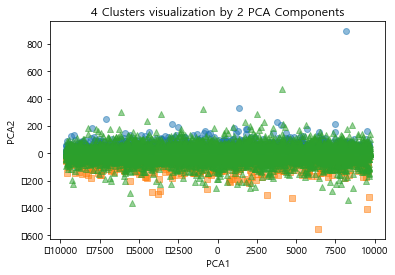

In [84]:
mark0_ind = data3[data3.cluster==0].index
mark1_ind = data3[data3.cluster==1].index
mark2_ind = data3[data3.cluster==2].index
# mark3_ind = data3[data3.cluster==3].index
# mark4_ind = data3[data3.cluster==4].index

plt.scatter(x=data3.loc[mark0_ind,'pca_x'],y=data3.loc[mark0_ind,'pca_y'],marker='o',alpha=0.5)
plt.scatter(x=data3.loc[mark1_ind,'pca_x'],y=data3.loc[mark1_ind,'pca_y'],marker='s',alpha=0.5)
plt.scatter(x=data3.loc[mark2_ind,'pca_x'],y=data3.loc[mark2_ind,'pca_y'],marker='^',alpha=0.5)
# plt.scatter(x=data3.loc[mark3_ind,'pca_x'],y=data3.loc[mark3_ind,'pca_y'],marker='*',alpha=0.5)
# plt.scatter(x=data3.loc[mark4_ind,'pca_x'],y=data3.loc[mark4_ind,'pca_y'],marker='+',alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('4 Clusters visualization by 2 PCA Components')